<h1>Selected Python Code for the Analysis and Visualization of Intestinal Protozoa Epidemiological Data</h1>
<h2> By Keenan Graham </h2>

## Import libraries and adjust settings ##

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import spline


In [2]:
from scipy import stats, integrate
from decimal import Decimal

In [4]:
import seaborn as sns

In [5]:
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400

In [6]:
new = pd.read_excel("Results_Updated_2014_2015.xlsx")
#merged = pd.read_excel("Update_Review/Sep/Files_to_Use/Corrected_Merged_Jan_9_2016.xlsx")
#comp = pd.read_excel("Update_Review/Sep/Files_to_Use/Cross_Ref/PosRec.xls", header=None)
#comp= comp.rename(columns={0:"Order"})|

## Binomial Probablity Mass Funciton Applied to Parasite Detection ##

Probability of finding a certain number of positive samples out of 36 total samples, calculated using the binomial probability mass function, based on an average positivity of 10.9%.

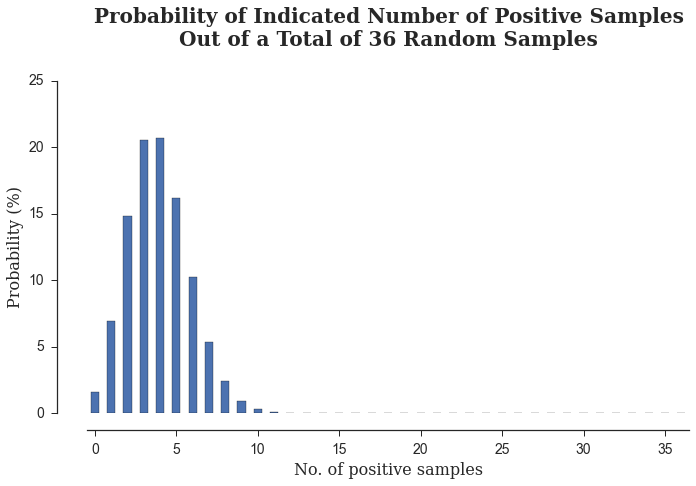

In [20]:
sns.set_style("ticks")
a = pd.DataFrame(stats.binom.pmf(np.arange(37), 36, .109)*100)
ax = a.plot(figsize=[10,7], kind='bar', legend=False, rot=0, xticks=[x for x in np.arange(37)[0:37:5]])
for label in ax.get_yticklabels():
    label.set_family("serif")
for label in ax.get_xticklabels():
    label.set_family("serif")
ax.set_xlabel("No. of positive samples", family="serif", fontsize=16)
ax.set_ylabel("Probability (%)", family="serif", fontsize=16)
ax.set_title('Probability of Indicated Number of Positive Samples\nOut of a Total of 36 Random Samples',weight="bold", family="serif", fontsize=20, y=1.09)
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))
ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_xticklabels(np.arange(37)[0:37:5])
sns.despine()
plt.tight_layout()
#plt.savefig("POP1.pdf")


In [12]:
#Calculate probability that more than 10 positive samples will be found out of 36 randomly chosen samples. 
(stats.binom.cdf(36, 36, .109)-stats.binom.cdf(10, 36, .109))*100

0.11483142010978442

In [14]:
#Full list of probabilities, from 0 to 36 positive samples. 
stats.binom.pmf(np.arange(36), 36, 0.109)*100

array([  1.56890752e+00,   6.90953212e+00,   1.47922924e+01,
         2.05088798e+01,   2.06987768e+01,   1.62059110e+01,
         1.02431300e+01,   5.37037602e+00,   2.38155985e+00,
         9.06412353e-01,   2.99390747e-01,   8.65700823e-02,
         2.20635498e-02,   4.98301358e-03,   1.00147627e-03,
         1.79688747e-04,   2.88515391e-05,   4.15239686e-06,
         5.36202388e-07,   6.21436048e-08,   6.46195846e-09,
         6.02301082e-10,   5.02378466e-11,   3.74093368e-12,
         2.47891088e-13,   1.45562982e-14,   7.53388655e-16,
         3.41353300e-17,   1.34226226e-18,   4.52979096e-20,
         1.29301553e-21,   3.06155518e-23,   5.85208884e-25,
         8.67772246e-27,   9.36692165e-29,   6.54798435e-31])

## Alternative view of probabilities with scaled shading##

C:\Users\keenang\Desktop\Py\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


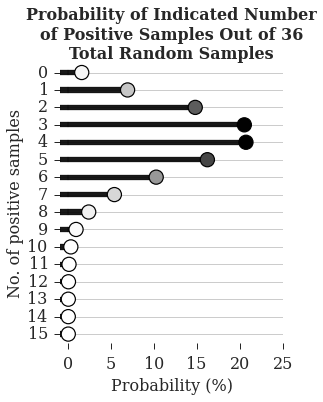

In [21]:
f, ax = plt.subplots(figsize=(4,5))

sns.set_style("whitegrid")

ax = sns.pointplot(x=a[0][:16],y=np.arange(16), palette="Set1", join=False, orient="h")
ax.set(xlim=(-1,None))
ax.yaxis.label.set_size(24)
ax.xaxis.label.set_size(24)
for label in ax.get_yticklabels():
    label.set_family("serif")
for label in ax.get_xticklabels():
    label.set_family("serif")
ax.xaxis.grid(False)
ax.yaxis.grid(True)
ax.tick_params(axis='both', which='both', labelsize=16)
ax.set_ylabel("No. of positive samples", family="serif", fontsize=16)
ax.set_xlabel("Probability (%)", family="serif", fontsize=16)
ax.set_title("Probability of Indicated Number\nof Positive Samples Out of 36\nTotal Random Samples", family="serif", fontsize=16, weight="bold")
plt.barh(np.arange(16),a[0][:16],0.3, color='black', align='center', alpha=0.9)
plt.barh(np.arange(16),[-1]*16, 0.3, color='black', align='center', alpha=0.9)
plt.scatter(a[0][:16], np.arange(16),c=a[0][:16], s=200, linewidth=1.2, zorder=2)

sns.despine(left=True, bottom=True)
#plt.savefig('PLBB.png', dpi=300, bbox_inches='tight')

## Table showing probability values ##

In [22]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
a["Prob"] = ["%0.2f%%" %x for x in a[0]]

In [25]:
a.rename(columns={'index':"No. Positive", "Prob":"Probability"}).drop(0, axis=1)[:15]

,Probability
0,1.57%
1,6.91%
2,14.79%
3,20.51%
4,20.70%
5,16.21%
6,10.24%
7,5.37%
8,2.38%
9,0.91%


## Merge and clean previously extracted organism data ##

In [ ]:
#Import all organisms, remove duplicates
from os import walk
mypath = "Update_Review/Sep/New"
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
    
f.remove('Parasit_Master_Merge_2014_And_2015_Overlap_Update_Sep.xlsx')

names = []
for l in f:
    names.append(l[0:l.find('_')])
    
i = 0
for file in f:
    a = names[i]
    mp = mypath + "/" + file
    vars()[a] = pd.read_excel(mp, parse_dates=True)
    i = i + 1
    
for i in range(len(names)):
    print(names[i] + " - " + str(len(vars()[names[i]])) + " - " + str(len(vars()[names[i]].drop_duplicates(subset="Order"))))
    vars()[names[i]] = vars()[names[i]].drop_duplicates(subset="Order")
    
#Clean up data
RNONE = RNONE[RNONE.RNONE == "RNONE"]
RHIS3 = RHIS3[(RHIS3['Ward Name'] != "Test UK, MD") & (RHIS3['Ward Name'] != "Doctor, Test")]
CGC = CGC[(CGC["Ward Name"] != "Doctor, Test") & (CGC["Ward Name"] != "Test Doctor")]
C2EIC = C2EIC[(C2EIC["Ward Name"] != "Doctor, Test") & (C2EIC["Ward Name"] != "Test Doctor")]
C2EIG  = C2EIG[(C2EIG["Ward Name"] != "Doctor, Test") & (C2EIG["Ward Name"] != "Test Doctor")]
C2EIH = C2EIH[(C2EIH["Ward Name"] != "Doctor, Test") & (C2EIH["Ward Name"] != "Test Doctor")]
C2EIC = C2EIC[C2EIC.C2EIC_Results != "pending"]
C2EIC = C2EIC[C2EIC.C2EIC_Results != "pending*"]
C2EIG = C2EIG[C2EIG.C2EIG_Results != "pending"]
C2EIH = C2EIH[C2EIH.C2EIH_Results != "pending"]
CGC = CGC[CGC.CGC_Results != "pending"]
v2EIAH = v2EIAH[(v2EIAH["v2EIAH_Results"] != "pending*")]
v2EIAH = v2EIAH[(v2EIAH["v2EIAH_Results"] != "TEST PENDING")]
v2EIAC = v2EIAC[(v2EIAC["v2EIAC_Results"] != "pending*")]
v2EIAG = v2EIAG[(v2EIAG["v2EIAG_Results"] != "pending*")]
C2EIH.ix[C2EIH.C2EIH_Results == "Negative Negati", "C2EIH_Results"] = "Negative"
C2EIH.ix[C2EIH.C2EIH_Results == "NEGATIVE", "C2EIH_Results"] = "Negative"
C2EIH.ix[C2EIH.C2EIH_Results == "NEGATIVE ", "C2EIH_Results"] = "Negative"
C2EIC.ix[C2EIC.C2EIC_Results == "POSITIVE", "C2EIC_Results"] = "Positive"
C2EIG.ix[C2EIG.C2EIG_Results == "POSITIVE", "C2EIG_Results"] = "Positive"
C2EIG.ix[C2EIG.C2EIG_Results == "NEGATIVE", "C2EIG_Results"] = "Negative"
CGC.ix[CGC.CGC_Results == "NEGATIVE", "CGC_Results"] = "Negative"
CGC.ix[CGC.CGC_Results == "POSITIVE", "CGC_Results"] = "Positive"
CGC.ix[CGC.CGC_Results == "Negative Negati", "CGC_Results"] = "Negative"
CGC.ix[CGC.CGC_Results == "Positive Positi", "CGC_Results"] = "Positive"

#Select positive EIA Values, prefix variable name with "p"

z = ['CGC','C2EIC','C2EIG','C2EIH','EIAG', 'EIAC', 'v2EIAH','v2EIAC','v2EIAG']
t = ['pCGC','pC2EIC','pC2EIG','pC2EIH','pEIAG', 'pEIAC', 'pv2EIAH','pv2EIAC','pv2EIAG']
r = ['nCGC','nC2EIC','nC2EIG','nC2EIH','nEIAG','nEIAC', 'nv2EIAH','nv2EIAC','nv2EIAG']

for i in range(len(z)):
    vars()[t[i]] = vars()[z[i]][vars()[z[i]][("%s_Results"%z[i])] == "Positive"]
for i in range(len(z)):
    vars()[r[i]] = vars()[z[i]][vars()[z[i]][("%s_Results"%z[i])] == "Negative"]

    
#Concat RHIS2 and RHIS3, rename all RHIS3s to RHIS2s.
RHIS3.ix[RHIS3.RHIS3 == "RHIS3", "RHIS3"] = "RHIS2"
RHIS2 = pd.concat([RHIS2, RHIS3.rename(columns={'RHIS3':'RHIS2', 'RHIS3_Results':'RHIS2_Results'})], ignore_index=True)

PCEIAC.EIAC_Results = "Positive"
PCEIAG.EIAG_Results = "Positive"
PCEIAH.EIAH_Results = "Positive"

#Concat Giardia EIAs, duplicates removed
PEIAG = pd.concat([pv2EIAG.rename(columns={'v2EIAG':'EIAG', 'v2EIAG_Results':'EIAG_Results'}),
pC2EIG.rename(columns={'C2EIG':'EIAG', 'C2EIG_Results':'EIAG_Results'}), pEIAG, PCEIAG], ignore_index=True).drop_duplicates(subset="Order")

#Concat Crypto EIAs, dupilicates removed
PEIAC = pd.concat([pv2EIAC.rename(columns={'v2EIAC':'EIAC', 'v2EIAC_Results':'EIAC_Results'}),
pC2EIC.rename(columns={'C2EIC':'EIAC', 'C2EIC_Results':'EIAC_Results'}), PCEIAC], ignore_index=True).drop_duplicates(subset="Order")

#Concat Histo EIAs, duplicates removed
PEIAH = pd.concat([pv2EIAH.rename(columns={'v2EIAH':'EIAH', 'v2EIAH_Results':'EIAH_Results'}),
pC2EIH.rename(columns={'C2EIH':'EIAH', 'C2EIH_Results':'EIAH_Results'}), PCEIAH], ignore_index=True).drop_duplicates(subset="Order")

#Merge!
merged = RNONE.merge(RBHOM, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RDFRG, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RNANA, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RCOLI, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RHART, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RCHIL, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RGIAR, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RHIS2, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RIODA, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RTRIC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(PEIAH, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(PEIAG, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(PEIAC, how="outer", on=['Order', 'Date', 'Ward Name'])

## Visualize Monthly Parasite Volume by Result ## 

In [31]:
#Rename some variables for later convenience
RNONE_RC = new[new.RNONE=="RNONE"]
RBHOM_RC = new[new.RBHOM=="RBHOM"]
RDFRG_RC = new[new.RDFRG=="RDFRG"]
RNANA_RC = new[new.RNANA=="RNANA"]
RCOLI_RC = new[new.RCOLI=="RCOLI"]
RHART_RC = new[new.RHART=="RHART"]
RCHIL_RC = new[new.RCHIL=="RCHIL"]
RGIAR_RC = new[new.RGIAR=="RGIAR"]
RHIS2_RC = new[new.RHIS2=="RHIS2"]
RIODA_RC = new[new.RIODA=="RIODA"]
RTRIC_RC = new[new.RTRIC=="RTRIC"]
REIAH_RC = new[new.EIAH_Results=="Positive"]
REIAG_RC = new[new.EIAG_Results=="Positive"]
REIAC_RC = new[new.EIAC_Results=="Positive"]

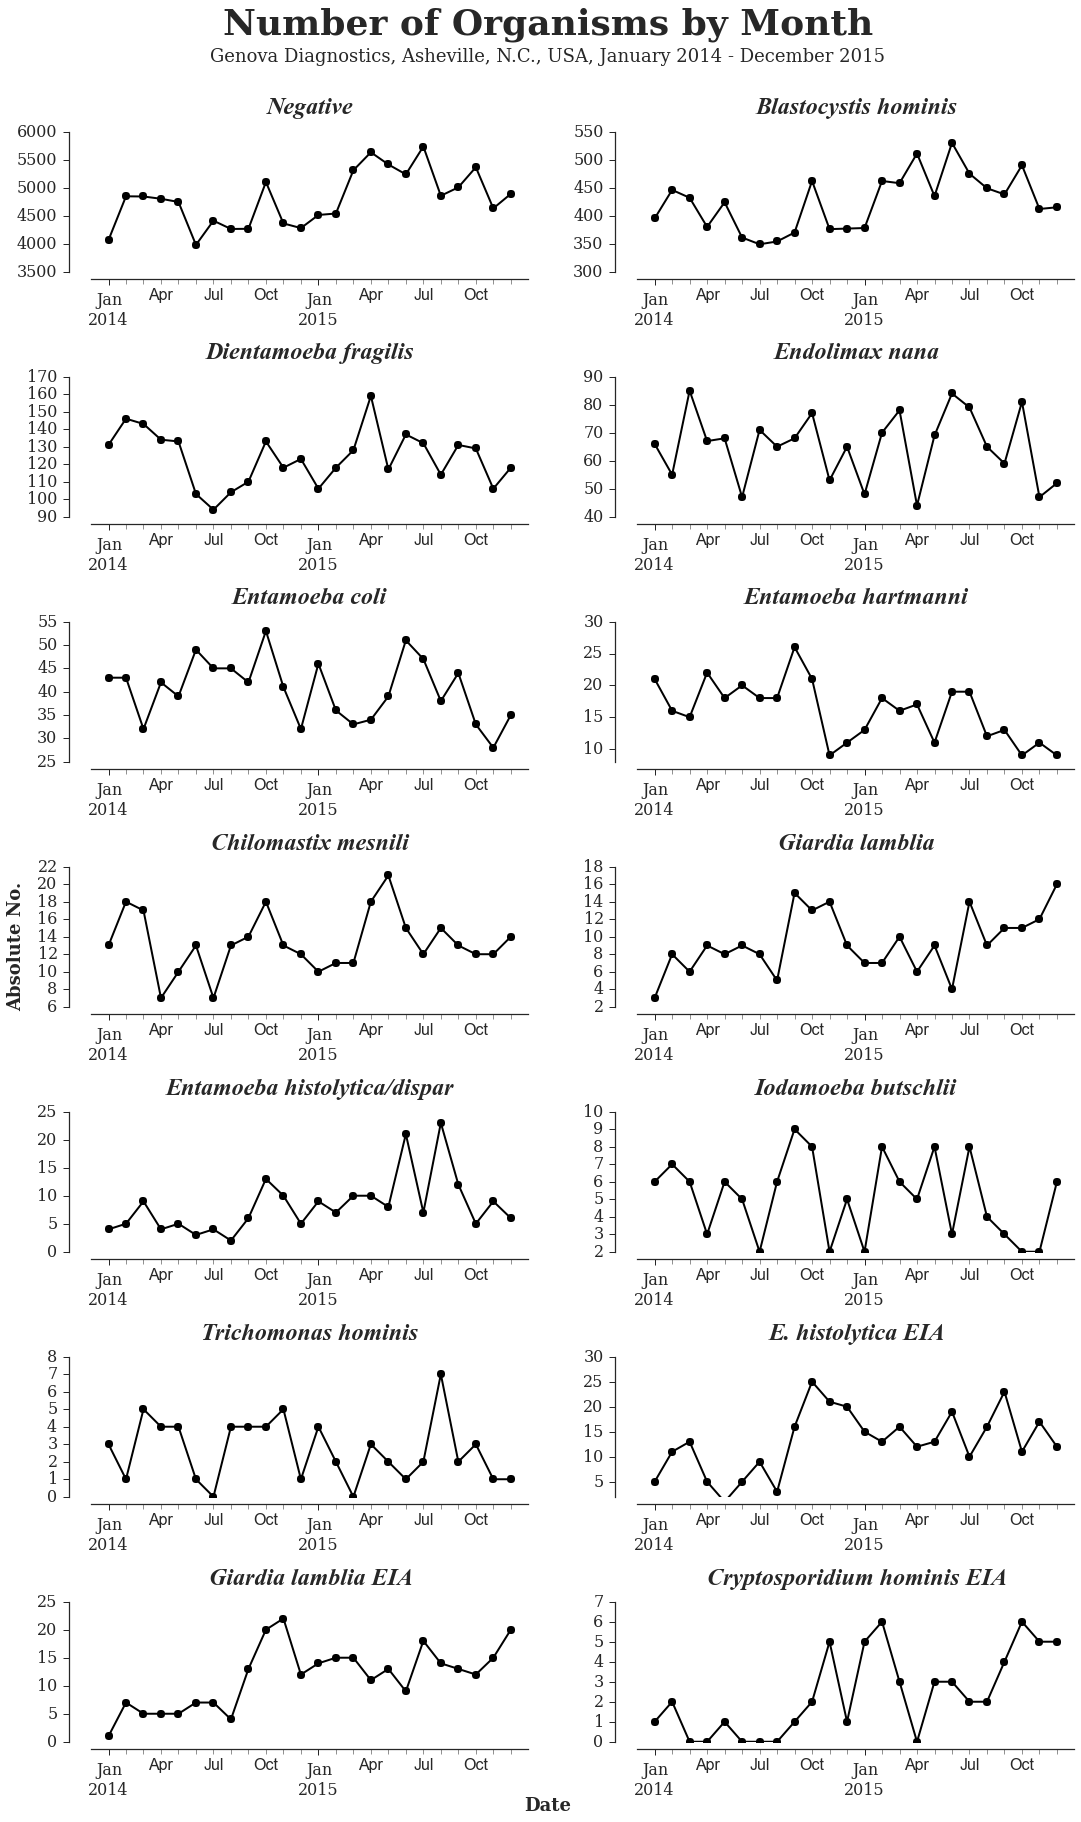

In [33]:
sns.set_style("ticks")
sns.set_style({'xtick.minor.size': 5})

def add_margin(ax,x=0.05,y=0.05):
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xmargin = (xlim[1]-xlim[0])*x
    ymargin = (ylim[1]-ylim[0])*y

    ax.set_xlim(xlim[0]-xmargin,xlim[1]+xmargin)
    ax.set_ylim(ylim[0]-ymargin,ylim[1]+ymargin)




fig, axes = plt.subplots(nrows=7, ncols=2,figsize=[15,24])
ax0 = RNONE_RC.groupby("Date").count().resample("M", how="sum")["RNONE"].plot(ax=axes[0,0], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax1 = RBHOM_RC.groupby("Date").count().resample("M", how="sum")["RBHOM"].plot(ax=axes[0,1], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax2 = RDFRG_RC.groupby("Date").count().resample("M", how="sum")["RDFRG"].plot(ax=axes[1,0], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax3 = RNANA_RC.groupby("Date").count().resample("M", how="sum")["RNANA"].plot(ax=axes[1,1], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax4 = RCOLI_RC.groupby("Date").count().resample("M", how="sum")["RCOLI"].plot(ax=axes[2,0], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax5 = RHART_RC.groupby("Date").count().resample("M", how="sum")["RHART"].plot(ax=axes[2,1], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax6 = RCHIL_RC.groupby("Date").count().resample("M", how="sum")["RCHIL"].plot(ax=axes[3,0], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax7 = RGIAR_RC.groupby("Date").count().resample("M", how="sum")["RGIAR"].plot(ax=axes[3,1], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax8 = RHIS2_RC.groupby("Date").count().resample("M", how="sum")["RHIS2"].plot(ax=axes[4,0], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax9= RIODA_RC.groupby("Date").count().resample("M", how="sum")["RIODA"].plot(ax=axes[4,1], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax10= RTRIC_RC.groupby("Date").count().resample("M", how="sum")["RTRIC"].fillna(0).plot(ax=axes[5,0], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax11= REIAH_RC.groupby("Date").count().resample("M", how="sum")["EIAH"].plot(ax=axes[5,1], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax12= REIAG_RC.groupby("Date").count().resample("M", how="sum")["EIAG"].plot(ax=axes[6,0], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")
ax13 = REIAC_RC.groupby("Date").count().resample("M", how="sum")["EIAC"].fillna(0).plot(ax=axes[6,1], marker='o', markersize=8, fontsize=16, lw=2, color="0.0", markerfacecolor="0")



l = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
names = ["Negative", "Blastocystis hominis","Dientamoeba fragilis","Endolimax nana","Entamoeba coli","Entamoeba hartmanni","Chilomastix mesnili", "Giardia lamblia","Entamoeba histolytica/dispar", "Iodamoeba butschlii", "Trichomonas hominis",  "E. histolytica EIA", "Giardia lamblia EIA","Cryptosporidium hominis EIA"]
for p, i in enumerate(l):
    x = "ax%s" %i
    eval(x).set_xlabel("", family="serif", fontsize=16, weight="bold")
    eval(x).set_ylabel("", family="serif", weight="bold", fontsize=16)
    eval(x).set_title(names[p],weight="bold",style='italic', family="serif", fontsize=24, y=1.09)
    eval(x).spines['bottom'].set_position(('axes', -0.05))
    eval(x).spines['left'].set_position(('axes', -0.05))
    eval(x).tick_params(axis='x', which='minor', labelsize=16)
    add_margin(eval(x),x=0.043,y=0.00)
    for label in eval(x).get_yticklabels():
        label.set_family("serif")
        label.set_fontsize(16)
    for label in eval(x).get_xticklabels():
        label.set_family("serif")
        label.set_fontsize(16)
ax2.set_ylim(ax2.get_ylim()[0],ax2.get_ylim()[1]+10)
ax3.set_ylim(ax3.get_ylim()[0],ax3.get_ylim()[1]+5)
ax5.set_ylim(ax5.get_ylim()[0],ax5.get_ylim()[1]+4)
ax7.set_ylim(ax7.get_ylim()[0],ax7.get_ylim()[1]+2)
ax9.set_ylim(ax9.get_ylim()[0],ax9.get_ylim()[1]+1)
ax13.set_ylim(ax13.get_ylim()[0],ax13.get_ylim()[1]+1)
ax10.set_ylim(ax10.get_ylim()[0],ax10.get_ylim()[1]+1)
ax11.set_ylim(ax9.get_ylim()[0],ax11.get_ylim()[1]+5)
plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
#ax0.set_title("Negative",weight="bold",style="normal", family="serif", fontsize=24, y=1.09)
#plt.subplots_adjust(wspace=0.2, hspace=1.2)
#plt.subplots_adjust(top=0.88, left=0.1, bottom=0.1) 
#plt.subplots_adjust(left=0.14, bottom=0.2) 


sns.despine()
fig.text(0.5, 0.00, 'Date', ha='center',family="serif", fontsize=18, weight="bold")
fig.text(0.000, 0.5, 'Absolute No.', va='center', rotation='vertical', family="serif", fontsize=18, weight="bold")
plt.suptitle("Number of Organisms by Month",y=1.044, family="serif", fontsize=36, weight="bold")
fig.text(0.5, 1.012, 'Genova Diagnostics, Asheville, N.C., USA, January 2014 - December 2015', ha='center',family="serif", fontsize=18)

#plt.savefig("Overview.pdf", bbox_inches='tight')

In [35]:
#Sum of total number of organisms found
new.describe().T['count'][5::2].sum()

17631

## Calculate daily positivity percent ##

In [56]:
#New percent by samples, not organisms
sns.set_style("ticks", {"xtick.major.size": 0, "ytick.major.size": 0})
sns.set_style("darkgrid")
np = new.groupby("Date").count()
np = np[np.columns[0:30:2]]
np['Percent'] = ((np["Order"]-np["RNONE"])/np["Order"]*100)
np= np.rename(columns={"Order":"Total"})
#np['Percent'] = np.Percent.apply(lambda x: Decimal(x))
#np['Percent'] = np.Percent.apply(lambda x: round(x,1))
#np['Percent'] = np.Percent.astype(float)

## Positivity summary statistics 

In [55]:
#Only days with more than 44 samples read to reduce noise
np[np.Total > 44]["Percent"].describe()

count   581.00
mean     11.05
std       3.19
min       1.19
25%       9.09
50%      10.76
75%      12.61
max      24.62
Name: Percent, dtype: float64

## Histogram of daily average number of positive samples found, assuming 36 samples total were resulted ##

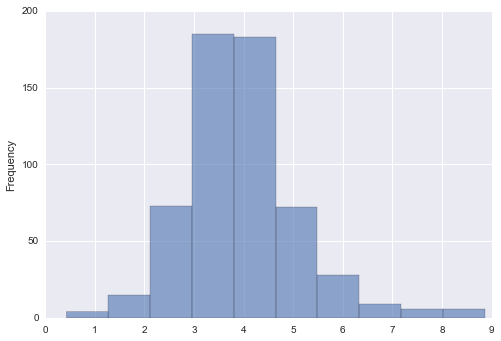

In [53]:
np[np.Total > 44]["Percent"].resample("D", how='mean').map(lambda x: (x/100)*36).plot(kind="hist", alpha=0.6)
sns.despine()

## Histogram of daily positivity with summary statistics included

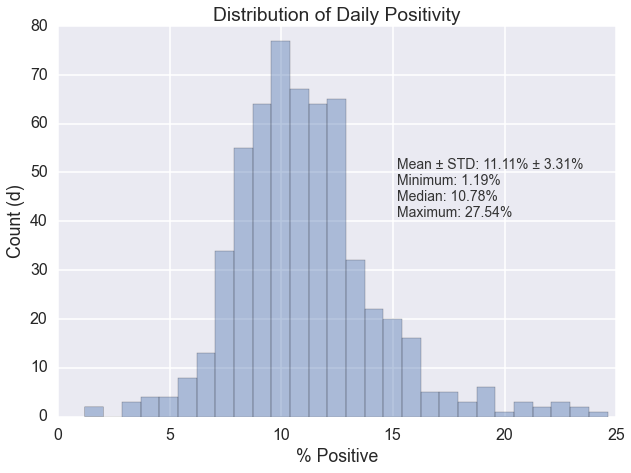

In [60]:
sns.set_context("poster")
plt.figure(figsize=(10, 7))
plt.title("Distribution of Daily Positivity")
plt.ylabel("Count (d)")
#plt.axvline(x=(np.Percent.mean() + np.Percent.std()),color='0.6',ls=':')
#plt.axvline(x=(np.Percent.mean() - np.Percent.std()),color='0.6',ls=':')
#plt.axvline(x=np.Percent.mean(),color='r',ls=':')
sns.distplot(np[np.Total > 44]["Percent"], kde=False)
plt.xlabel("% Positive")
plt.ylim([0,80])
plt.text(15.2,40.9,"Mean ± STD: 11.11% ± 3.31%\nMinimum: 1.19%\nMedian: 10.78%\nMaximum: 27.54%", fontsize=14,color="0.2", fontname='Arial')
plt.savefig("DDP_by_Sample.png")

In [61]:
from decimal import Decimal
pbd = pd.DataFrame()

## Summary of All Results

In [63]:
new.describe()

,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results
count,129172,129172,129172,115093,115093,10179,10179,2967,2967,1563,1563,970,970,382,382,319,319,223,223,197,197,122,122,64,64,311,311,277,277,57,57
unique,129172,617,6540,1,1,1,4,1,4,1,15,1,12,1,11,1,12,1,12,1,14,1,13,1,4,3,1,3,1,2,1
top,I6020974,2014-02-05 00:00:00,Referring Atlanta,RNONE,NONE,RBHOM,MOD,RDFRG,FEW TROPH(S),RNANA,FEW T/C,RCOLI,FEW T/C,RHART,FEW T/C,RCHIL,MOD T/C,RGIAR,RARE CYST(S),RHIS2,FEW T/C W/O RBC,RIODA,MOD T/C,RTRIC,MANY TROPH(S),2EIAH,Positive,C2EIG,Positive,C2EIC,Positive
freq,1,519,24788,115093,115093,10179,3252,2967,1023,1563,312,970,231,382,91,319,63,223,56,197,57,122,30,64,21,162,311,158,277,36,57
first,NaN,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Summary of Positive Results

In [75]:
new[new.RNONE!="RNONE"].describe()

,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results
count,14079,14079,14079,0.00,0.00,10179,10179,2967,2967,1563,1563,970,970,382,382,319,319,223,223,197,197,122,122,64,64,311,311,277,277,57,57
unique,14079,601,2609,0.00,0.00,1,4,1,4,1,15,1,12,1,11,1,12,1,12,1,14,1,13,1,4,1,1,1,1,1,1
top,I6240322,2014-02-05 00:00:00,Referring Atlanta,nan,nan,RBHOM,MOD,RDFRG,FEW TROPH(S),RNANA,FEW T/C,RCOLI,FEW T/C,RHART,FEW T/C,RCHIL,FEW T/C,RGIAR,RARE CYST(S),RHIS2,FEW T/C W/O RBC,RIODA,MOD T/C,RTRIC,MANY TROPH(S),EIAH,Positive,EIAG,Positive,EIAC,Positive
freq,1,63,2172,nan,nan,10179,3252,2967,1023,1563,312,970,231,382,91,319,63,223,56,197,57,122,30,64,21,311,311,277,277,57,57
first,NaN,2014-01-02 00:00:00,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-31 00:00:00,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Multiple Infection Table

Shows proportion of samples positive for a primary organism that are also positivie for a secondary organism. 

In [66]:
#Create correlation table
mer = new
mer.loc[mer.EIAH == "2EIAH", "EIAH"] = "EIAH"
mer.loc[mer.EIAH == "C2EIH", "EIAH"] = "EIAH"
mer.loc[mer.EIAG == "2EIAG", "EIAG"] = "EIAG"
mer.loc[mer.EIAG == "C2EIG", "EIAG"] = "EIAG"
mer.loc[mer.EIAC == "C2EIC", "EIAC"] = "EIAC"
mer.loc[mer.EIAC == "2EIAC", "EIAC"] = "EIAC"


c = pd.DataFrame()
for i in mer.columns[5::2]:
    z = mer[mer["%s"%i]=="%s"%i].describe()
    c = pd.concat([c, z])
c = c.loc[:,"RBHOM"::2][0::6]
c.index = c.columns.T
for i,y in enumerate(c.columns[:-3]):
    c.columns.values[i] = c.columns.values[i][1:]
c = c.astype(int)

z = 0
l = []
perc = pd.DataFrame()
for z, y in enumerate(c.columns):
    l = []
    for i, y in enumerate(c.iloc[z, :]):
        a = '{0:.4f}'.format((y/c.iloc[z,z])*100)
        l.append(a)
    
    perc["%s"%c.columns[z]] = l 
    z = z+1  
    
for z,y in enumerate (c.columns):
    c.iloc[:,z] = c.iloc[:,z].map(str) + " (" + perc.T[z].map(str) +")"
    

#c.to_csv("Update_Review/Sep/Files_to_Use/Multi_Infect.csv")
c

,BHOM,DFRG,NANA,COLI,HART,CHIL,GIAR,HIS2,IODA,TRIC,EIAH,EIAG,EIAC
BHOM,10179 (100.0000),1037 (10.1876),832 (8.1737),403 (3.9591),181 (1.7782),93 (0.9136),78 (0.7663),67 (0.6582),88 (0.8645),12 (0.1179),51 (0.5010),77 (0.7565),7 (0.0688)
DFRG,1037 (34.9511),2967 (100.0000),256 (8.6282),89 (2.9997),51 (1.7189),21 (0.7078),21 (0.7078),8 (0.2696),25 (0.8426),3 (0.1011),7 (0.2359),19 (0.6404),1 (0.0337)
NANA,832 (53.2310),256 (16.3788),1563 (100.0000),124 (7.9335),103 (6.5899),29 (1.8554),21 (1.3436),22 (1.4075),40 (2.5592),5 (0.3199),13 (0.8317),18 (1.1516),2 (0.1280)
COLI,403 (41.5464),89 (9.1753),124 (12.7835),970 (100.0000),67 (6.9072),17 (1.7526),13 (1.3402),22 (2.2680),20 (2.0619),2 (0.2062),21 (2.1649),15 (1.5464),1 (0.1031)
HART,181 (47.3822),51 (13.3508),103 (26.9634),67 (17.5393),382 (100.0000),11 (2.8796),11 (2.8796),18 (4.7120),19 (4.9738),1 (0.2618),15 (3.9267),8 (2.0942),1 (0.2618)
CHIL,93 (29.1536),21 (6.5831),29 (9.0909),17 (5.3292),11 (3.4483),319 (100.0000),4 (1.2539),4 (1.2539),1 (0.3135),6 (1.8809),1 (0.3135),4 (1.2539),1 (0.3135)
GIAR,78 (34.9776),21 (9.4170),21 (9.4170),13 (5.8296),11 (4.9327),4 (1.7937),223 (100.0000),5 (2.2422),8 (3.5874),1 (0.4484),4 (1.7937),178 (79.8206),6 (2.6906)
HIS2,67 (34.0102),8 (4.0609),22 (11.1675),22 (11.1675),18 (9.1371),4 (2.0305),5 (2.5381),197 (100.0000),2 (1.0152),2 (1.0152),146 (74.1117),3 (1.5228),0 (0.0000)
IODA,88 (72.1311),25 (20.4918),40 (32.7869),20 (16.3934),19 (15.5738),1 (0.8197),8 (6.5574),2 (1.6393),122 (100.0000),1 (0.8197),1 (0.8197),5 (4.0984),1 (0.8197)
TRIC,12 (18.7500),3 (4.6875),5 (7.8125),2 (3.1250),1 (1.5625),6 (9.3750),1 (1.5625),2 (3.1250),1 (1.5625),64 (100.0000),1 (1.5625),0 (0.0000),0 (0.0000)


## Calculate positivity by ward, show results for wards that have submitted of 1000 samples

In [68]:
merged = new

In [72]:
#Positivity by Ward
from decimal import Decimal
pbw = pd.DataFrame(merged[merged.RNONE != "RNONE"]['Ward Name'].value_counts())
pbw["Total"] = merged["Ward Name"].value_counts()
pbw = pbw.reset_index().rename(columns={"index":"Ward Name", "Ward Name": "Positive"})

pbw['Percentage'] = (pbw.Positive/pbw.Total)*100
pbw["Dec"] = pbw["Percentage"].apply(lambda x: Decimal(x))
pbw["Round"] = pbw["Dec"].apply(lambda x: round(x,1))
pbw = pbw.drop("Percentage", axis=1)
pbw = pbw.drop("Dec", axis=1)
pbw = pbw.rename(columns={"Round":"Percent"})
pbw = pbw.sort_values(by=["Total", "Percent"], ascending=False)
pbw.sort_values(by=["Total","Percent"])
#Ward name hidden
pbw[pbw.Total > 1000].drop("Ward Name", axis=1)

,Positive,Total,Percent
0,2172,24788,8.8
1,1399,4270,32.8
2,296,1108,26.7
3,240,1066,22.5
5,124,1006,12.3


In [76]:
merged=new
#Set EIA name to EIA, get secondary organisms and number relative to primary organism; compile to table, calculate percentages, export to Excel. 
merged.loc[merged.EIAG.notnull(), 'EIAG'] = "EIAG"
merged.loc[merged.EIAH.notnull(), "EIAH"] = "EIAH"
merged.loc[merged.EIAC.notnull(), "EIAC"] = "EIAC"

## Transformed Summary Table

In [80]:
merged[merged.columns[1::2]].describe().T

,count,unique,top,freq,first,last
Date,129172,617,2014-02-05 00:00:00,519,2014-01-02 00:00:00,2015-12-31 00:00:00
RNONE,115093,1,RNONE,115093,NaN,NaN
RBHOM,10179,1,RBHOM,10179,NaN,NaN
RDFRG,2967,1,RDFRG,2967,NaN,NaN
RNANA,1563,1,RNANA,1563,NaN,NaN
RCOLI,970,1,RCOLI,970,NaN,NaN
RHART,382,1,RHART,382,NaN,NaN
RCHIL,319,1,RCHIL,319,NaN,NaN
RGIAR,223,1,RGIAR,223,NaN,NaN
RHIS2,197,1,RHIS2,197,NaN,NaN


## Show only number of positive samples

In [79]:
merged[merged.columns[1::2]].describe().T["count"][2:]

RBHOM    10179
RDFRG     2967
RNANA     1563
RCOLI      970
RHART      382
RCHIL      319
RGIAR      223
RHIS2      197
RIODA      122
RTRIC       64
EIAH       311
EIAG       277
EIAC        57
Name: count, dtype: object

## Color visualization of results by month on a log scale

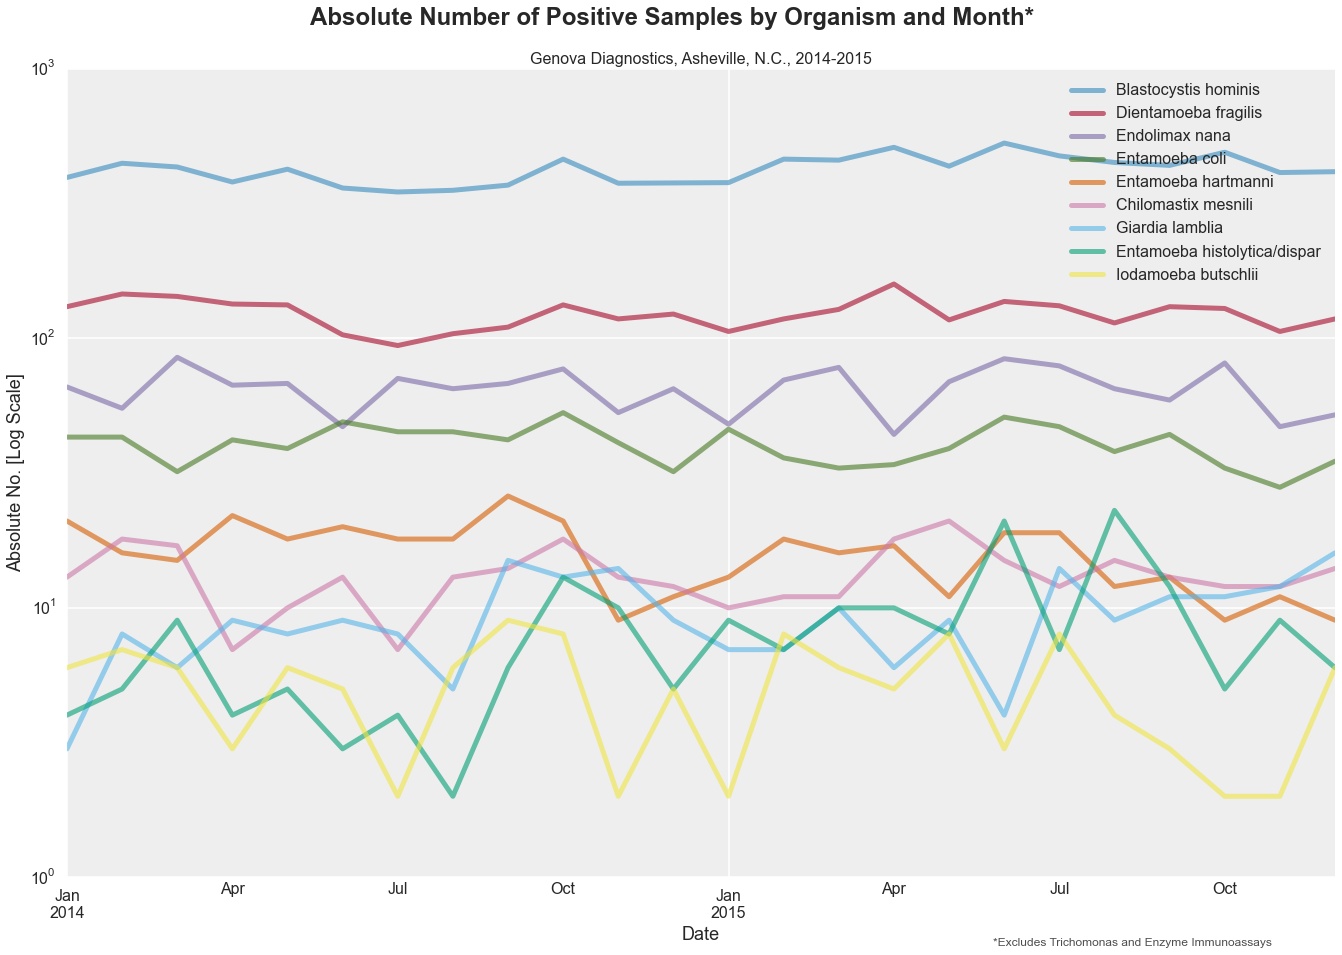

In [84]:

#Cycle through styles bmh->fivethirtyeight->ggplot->bmh to get desired look
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#ax.xaxis.set_ticks_position('top')
#ax.yaxis.grid(linestyle = '-', color = 'gray')
#ax.invert_yaxis()
#fig=plt.figure()
plt.style.use('bmh') 
ax = merged[merged.columns[1:22:2]].drop("RNONE", axis=1).rename(columns={ "RBHOM":"Blastocystis hominis", 
                                                                          "RDFRG":"Dientamoeba fragilis",
                                                                          "RNANA":"Endolimax nana",
                                                                          "RCOLI":"Entamoeba coli",
                                                                          "RHART":"Entamoeba hartmanni", 
                                                                          "RCHIL":"Chilomastix mesnili", 
                                                                          "RGIAR": "Giardia lamblia", 
                                                                          "RHIS2":"Entamoeba histolytica/dispar", 
                                                                          "EIAH":"E. histolytica Enzyme Immunoassay (EIA)", 
                                                                          "EIAG":"Giardia lamblia EIA", 
                                                                          "EIAC":"Cryptosporidium hominis EIA", 
                                                                          "RIODA":"Iodamoeba butschlii", 
                                                                          "RTRIC":"Trichomonas hominis"})\
                                                                        .groupby("Date")\
                                                                        .count().sort_index()\
                                                                        .resample('M', how='sum')\
                                                                        .plot(figsize=(19,13), 
                                                                              alpha=0.6, 
                                                                              linewidth=5, 
                                                                              fontsize=16)
plt.yscale('log')
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")  
#plt.tick_params(axis='both', which='major', labelsize=14)
#plt.tick_params(axis='both', which='minor', labelsize=14)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.spines['bottom'].set_visible(True)
#ax1.grid(b=True, which='minor')
#ax1.grid(b=True, which='major', color="0.7", linestyle='--')
#for i, y in enumerate(ax):
    #ax[i].set_xlabel("", fontsize="16")
    #ax[i].set_ylabel("Absolute No.")
    #ax[i].legend(loc='lower right')


#ax[i].xaxis.tick_top()
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.ylabel('Absolute No. [Log Scale]', fontsize="18")
plt.xlabel('Date',fontsize="18")
ax.get_figure().suptitle('Absolute Number of Positive Samples by Organism and Month*', fontsize=24,fontweight='bold', y=1.025)
ax.set_title("Genova Diagnostics, Asheville, N.C., 2014-2015", fontsize=16)
#ax[3].legend(loc='lower right')
#ax[0].legend(loc='lower right')
#ax[8].legend(loc='lower right')
#ax[10].legend(loc='lower right')
#ax[11].legend(loc='lower right')
#ax[13].legend(loc='lower right')



plt.tight_layout()
ax.get_figure().text(0.735,0.022,"*Excludes Trichomonas and Enzyme Immunoassays", fontsize=12, color="0.3")

plt.savefig("test3.png", bbox_inches='tight')


## Color visualization of results by month (stacked)

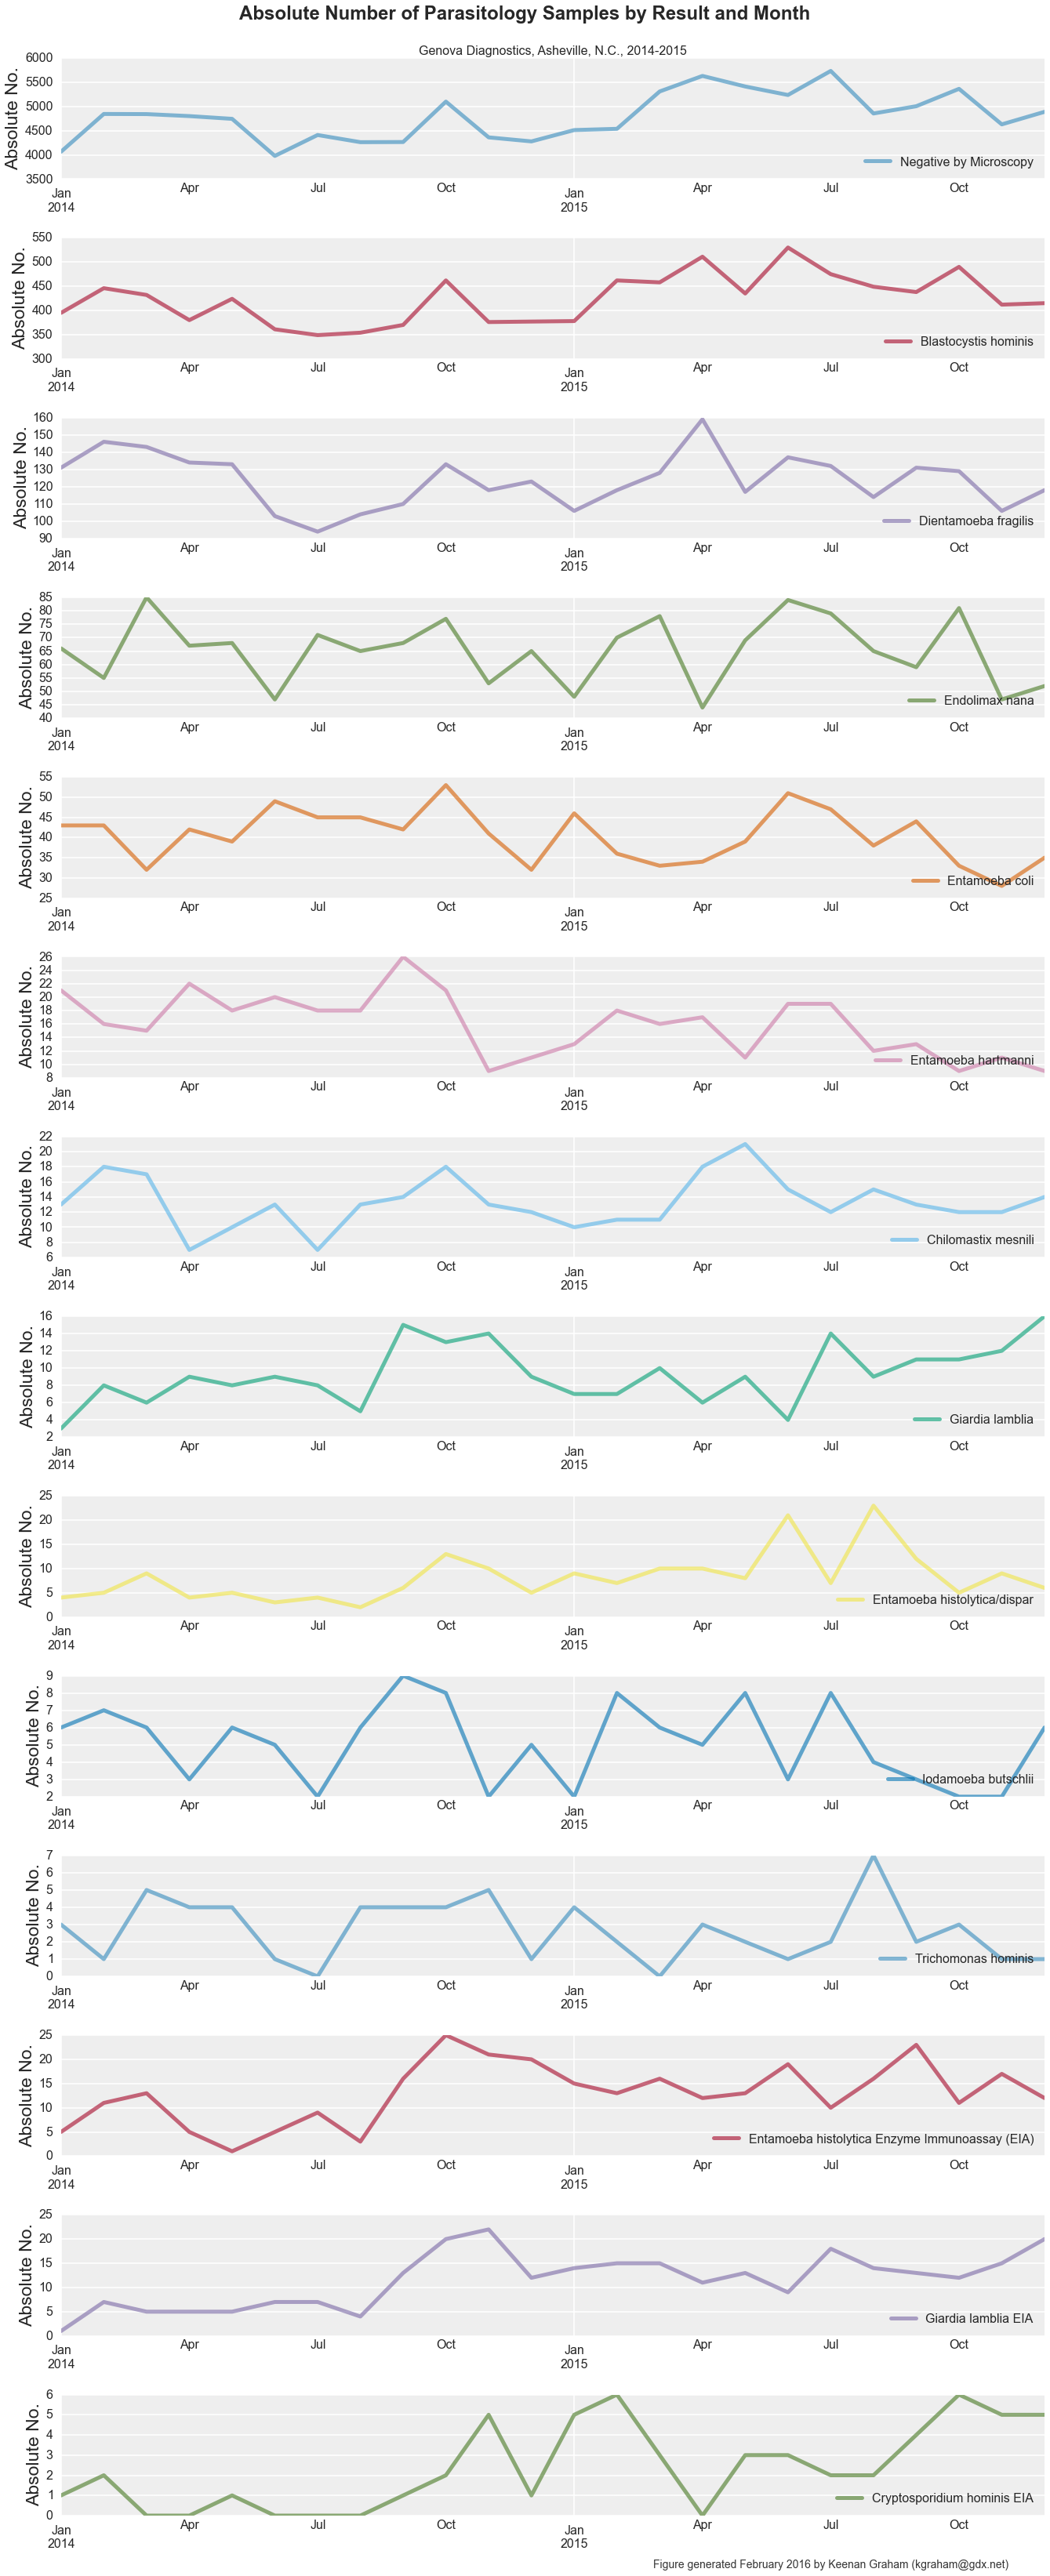

In [85]:
#Cycle through styles bmh->fivethirtyeight->ggplot->bmh to get desired look
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#ax.xaxis.set_ticks_position('top')
#ax.yaxis.grid(linestyle = '-', color = 'gray')
#ax.invert_yaxis()
#fig=plt.figure()
plt.style.use('bmh') 
ax = merged[merged.columns[1:31:2]].rename(columns={"RNONE":"Negative by Microscopy", "RBHOM":"Blastocystis hominis", "RDFRG":"Dientamoeba fragilis","RNANA":"Endolimax nana","RCOLI":"Entamoeba coli","RHART":"Entamoeba hartmanni", "RCHIL":"Chilomastix mesnili", "RGIAR": "Giardia lamblia", "RHIS2":"Entamoeba histolytica/dispar", "EIAH":"Entamoeba histolytica Enzyme Immunoassay (EIA)", "EIAG":"Giardia lamblia EIA", "EIAC":"Cryptosporidium hominis EIA", "RIODA":"Iodamoeba butschlii", "RTRIC":"Trichomonas hominis"}).groupby("Date").count().sort_index().resample('M', how='sum').plot(figsize=(19,45), alpha=0.6, linewidth=5, subplots=True, sharex=False, fontsize=16)
#plt.yscale('log')
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")  
#plt.tick_params(axis='both', which='major', labelsize=14)
#plt.tick_params(axis='both', which='minor', labelsize=14)
#ax1.spines['right'].set_visible(False)
#ax1.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.spines['bottom'].set_visible(True)
#ax1.grid(b=True, which='minor')
#ax1.grid(b=True, which='major', color="0.7", linestyle='--')
for i, y in enumerate(ax):
    ax[i].set_xlabel("", fontsize="16")
    ax[i].set_ylabel("Absolute No.")
    ax[i].legend(loc='lower right')


#ax[i].xaxis.tick_top()
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.ylabel('Absolute No. [Log Scale]', fontsize="18")
#plt.xlabel('Date',fontsize="18")
ax[0].get_figure().suptitle('Absolute Number of Parasitology Samples by Result and Month', fontsize=24,fontweight='bold', y=1.009)
ax[0].set_title("Genova Diagnostics, Asheville, N.C., 2014-2015", fontsize=16)
#ax[3].legend(loc='lower right')
#ax[0].legend(loc='lower right')
#ax[8].legend(loc='lower right')
#ax[10].legend(loc='lower right')
#ax[11].legend(loc='lower right')
#ax[13].legend(loc='lower right')



plt.tight_layout()
ax[0].get_figure().text(0.62,0,"Figure generated February 2016 by Keenan Graham (kgraham@gdx.net)", fontsize=14, color="0.2")

#plt.savefig("test2.png", bbox_inches='tight')

## Positivity by Month

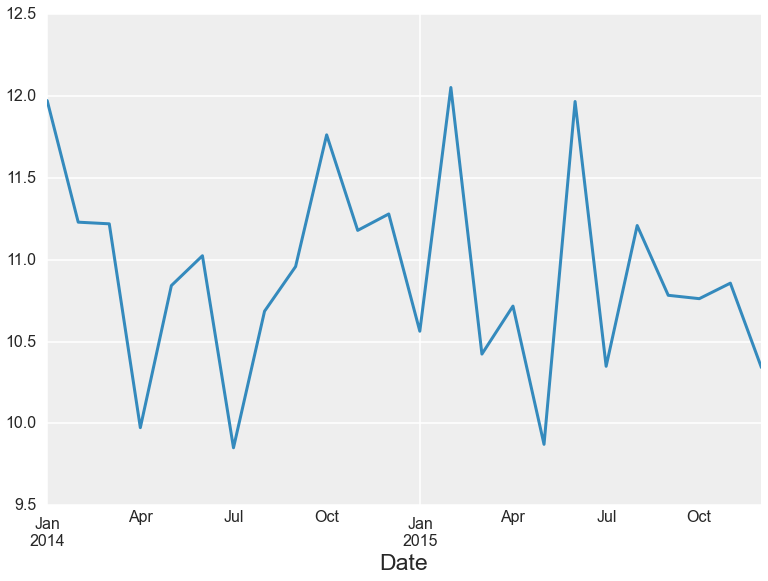

In [87]:
((merged[merged.columns[0:31]].groupby("Date").count().sort_index().resample('M', how='sum')["Order"] - merged[merged.columns[0:31]].groupby("Date").count().sort_index().resample('M', how='sum')["RNONE"])/ merged[merged.columns[0:31]].groupby("Date").count().sort_index().resample('M', how='sum')['Order']*100).plot(lw=3)

## Positive samples by month

In [89]:
(merged[merged.columns[0:31]].groupby("Date").count().sort_index().resample('M', how='sum')["Order"] - merged[merged.columns[0:31]].groupby("Date").count().sort_index().resample('M', how='sum')["RNONE"])

Date
2014-01-31    553
2014-02-28    613
2014-03-31    612
2014-04-30    532
2014-05-31    577
2014-06-30    493
2014-07-31    482
2014-08-31    510
2014-09-30    525
2014-10-31    680
2014-11-30    549
2014-12-31    544
2015-01-31    533
2015-02-28    622
2015-03-31    618
2015-04-30    676
2015-05-31    593
2015-06-30    712
2015-07-31    662
2015-08-31    613
2015-09-30    605
2015-10-31    647
2015-11-30    564
2015-12-31    564
Freq: M, dtype: int64

## Results summary for 2015 only

In [90]:
merged[(merged.Date > "2015-1") & (merged.Date < "2015-12")].describe()

,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results
count,63085,63085,63085,56240,56240,5038,5038,1377,1377,724,724,429,429,158,158,150,150,100,100,121,121,51,51,27,27,165,165,149,149,39,39
unique,63085,283,5331,1,1,1,4,1,4,1,14,1,11,1,11,1,12,1,12,1,10,1,10,1,4,1,1,1,1,1,1
top,I8210387,2015-05-28 00:00:00,Genova Europe,RNONE,NONE,RBHOM,FEW,RDFRG,FEW TROPH(S),RNANA,FEW T/C,RCOLI,FEW T/C,RHART,FEW TROPH(S),RCHIL,FEW T/C,RGIAR,RARE CYST(S),RHIS2,RAR T W/O RBC,RIODA,FEW T/C,RTRIC,MANY TROPH(S),EIAH,Positive,EIAG,Positive,EIAC,Positive
freq,1,498,671,56240,56240,5038,1704,1377,486,724,173,429,95,158,37,150,40,100,29,121,32,51,17,27,10,165,165,149,149,39,39
first,NaN,2015-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Scatter of negative and positive results

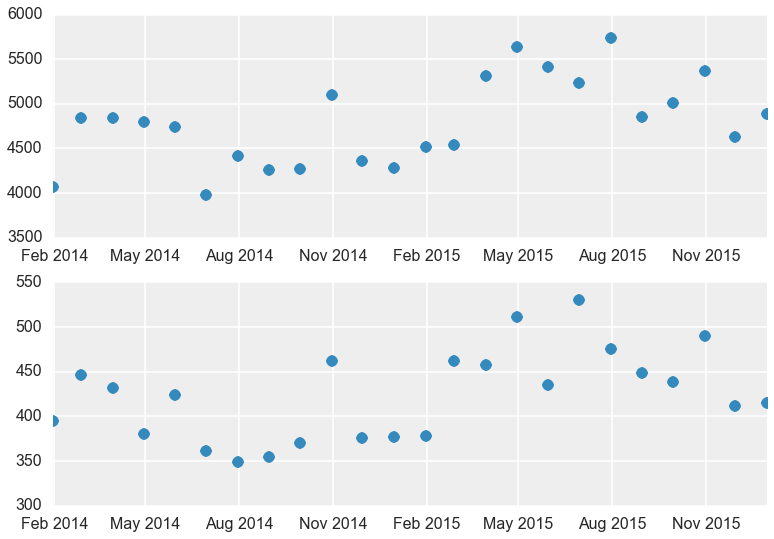

In [92]:
import matplotlib.dates

merged.Date.value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.style.use('ggplot') 
ax1.plot_date(merged[merged.RNONE == "RNONE"].Date.value_counts().sort_index().resample('M', how='sum').index, merged[merged.RNONE == "RNONE"].Date.value_counts().sort_index().resample('M', how='sum'), linewidth=5.5)
ax2.plot_date(merged[merged.RBHOM == "RBHOM"].Date.value_counts().sort_index().resample('M', how='sum').index, merged[merged.RBHOM == "RBHOM"].Date.value_counts().sort_index().resample('M', how='sum'), linewidth=5.5)


## Side-by-side comparison of results by year with number above bar

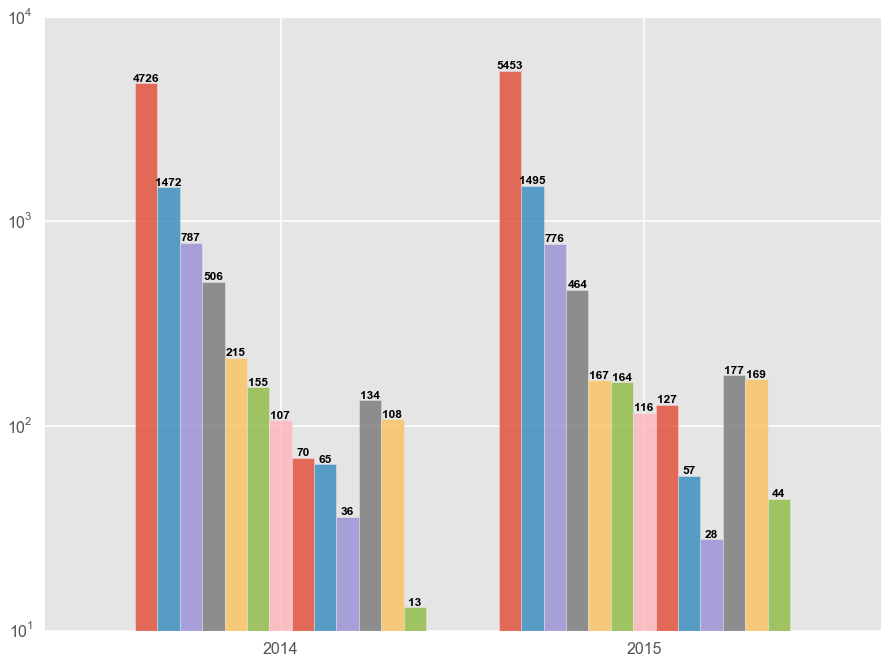

In [96]:
#sns.set_style("whitegrid")
#sns.set_palette("Set1", 13, .75)
def autolabel(rects):
    

    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., height + (height*0.12), '%0.0f' %height,
              ha='center', va='top', fontsize=12, color='0', weight="bold")
        
plt.figure(figsize=(12,6))
ax =merged[merged.columns[1:31:2]].drop("RNONE", axis=1).rename(columns={"RBHOM":"Blastocystis hominis", "RDFRG":"Dientamoeba fragilis","RNANA":"Endolimax nana","RCOLI":"Entamoeba coli","RHART":"Entamoeba hartmanni", "RCHIL":"Chilomastix mesnili", "RGIAR": "Giardia lamblia", "RHIS2":"Entamoeba histolytica/dispar", "EIAH":"Entamoeba histolytica Enzyme Immunoassay (EIA)", "EIAG":"Giardia lamblia EIA", "EIAC":"Cryptosporidium hominis EIA", "RIODA":"Iodamoeba butschlii", "RTRIC":"Trichomonas hominis"}).groupby("Date").count().sort_index().resample('A', how='sum').plot(figsize=(15,11), legend=False, kind="bar", width=0.8, alpha=0.8)

plt.ylabel("")
plt.title("")
plt.xticks([0,1],["2014", "2015"], rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('')
plt.yscale('log')
plt.legend


rects = ax.patches
autolabel(rects)


## Test Code

In [ ]:
for i in range(len(names)):
    if names[i] != "GIAR" and names[i] != "PCEIAC" and names[i] != "PCEIAG" and names[i] != "PCEIAH" and names[i]:
        print(vars()[names[i]]["%s_Results"%names[i]].value_counts())
        

fig = plt.figure(figsize=(15,11))
orgs = [RNANA, RDFRG, RCOLI, RHART, RHIS2, RGIAR, RCHIL, RIODA, RTRIC, RBHOM]
for org in orgs:

    x_smooth = np.linspace(0, len(org.Date.value_counts().resample('M', how='sum'))-1, 300)
    #np.arange(0,len(org.Date.value_counts().resample('M', how='sum'))-1)
    y_smooth = spline(np.arange(0,len(org.Date.value_counts().resample('M', how='sum'))),org.Date.value_counts().resample('M', how='sum'), 
                      x_smooth)

    plt.plot(x_smooth, y_smooth ,linewidth=5.5, alpha=0.6)

x = np.arange(0,len(org.Date.value_counts().resample('M', how='sum')))

plt.xticks(x, org.Date.value_counts().resample('M', how='sum').index.strftime("%b"), rotation='0')
#plt.ylim([0,org.Date.value_counts().resample('M', how='sum').max()+75])
plt.yscale('log')#, nonposy='clip')
#from matplotlib.ticker import ScalarFormatthttp://localhost:8888/notebooks/Untitled%20Folder/MergeViz.ipynb#er
#ax = fig.gca().yaxis
#ax.set_major_formatter(ScalarFormatter()) 


plt.xlim([0,21])
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")    
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
fig.text(0.313,0.06,"2014",fontsize=16)
fig.text(0.699,0.06,"2015",fontsize=16)



In [ ]:
org = RCHIL
fig = plt.figure(figsize=(11,8))


x_smooth = np.linspace(0, len(org.Date.value_counts().resample('M', how='sum'))-1, 300)
#np.arange(0,len(org.Date.value_counts().resample('M', how='sum'))-1)
y_smooth = spline(np.arange(0,len(org.Date.value_counts().resample('M', how='sum'))),org.Date.value_counts().resample('M', how='sum').fillna(0), 
                      x_smooth)
plt.plot(x_smooth, y_smooth ,linewidth=5.5, alpha=0.6)

x = np.arange(0,len(org.Date.value_counts().resample('M', how='sum')))

plt.xticks(x, org.Date.value_counts().resample('M', how='sum').index.strftime("%b"), rotation='0')

plt.ylim([org.Date.value_counts().resample('M', how='sum').min()-org.Date.value_counts().resample('M', how='sum').std(),org.Date.value_counts().resample('M', how='sum').max()+org.Date.value_counts().resample('M', how='sum').std()])

#plt.ylim([0,org.Date.value_counts().resample('M', how='sum').max()+org.Date.value_counts().resample('M', how='sum').std()])

#plt.yscale('log')#, nonposy='clip')
#from matplotlib.ticker import ScalarFormatter
#ax = fig.gca().yaxis
#ax.set_major_formatter(ScalarFormatter()) 


plt.xlim([0,21])
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")    
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
fig.text(0.313,0.06,"2014",fontsize=16)
fig.text(0.699,0.06,"2015",fontsize=16)


## Positivity by Ward

In [102]:
rbwn = merged[merged.columns[0:31:2]].drop("Ward Name",axis=1).rename(columns={"Order":"Total",
                                                                        "RNONE_Results":"Negative", "RBHOM_Results":"B. hominis", 
                                                                          "RDFRG_Results":"D. fragilis",
                                                                          "RNANA_Results":"E. nana",
                                                                          "RCOLI_Results":"E. coli",
                                                                          "RHART_Results":"E. hartmanni", 
                                                                          "RCHIL_Results":"C. mesnili", 
                                                                          "RGIAR_Results": "G. lamblia", 
                                                                          "RHIS2_Results":"E. histolytica/dispar", 
                                                                          "EIAH_Results":"E. histolytica/dispar EIA", 
                                                                          "EIAG_Results":"G. lamblia EIA", 
                                                                          "EIAC_Results":"C. hominis EIA", 
                                                                          "RIODA_Results":"I. butschlii", 
                                                                          "RTRIC_Results":"T. hominis"}).groupby(merged['Ward Name']).count()
rbwn["Positivity (%)"] = (((rbwn['Total'] - rbwn["Negative"])/rbwn['Total'])*100)

In [104]:
rbwn["Positivity (%)"] = rbwn["Positivity (%)"].apply(lambda x: Decimal(x))
rbwn["Positivity (%)"] = rbwn["Positivity (%)"].apply(lambda x: round(x,1))
rbwn["Positivity (%)"] = rbwn["Positivity (%)"].astype(float)

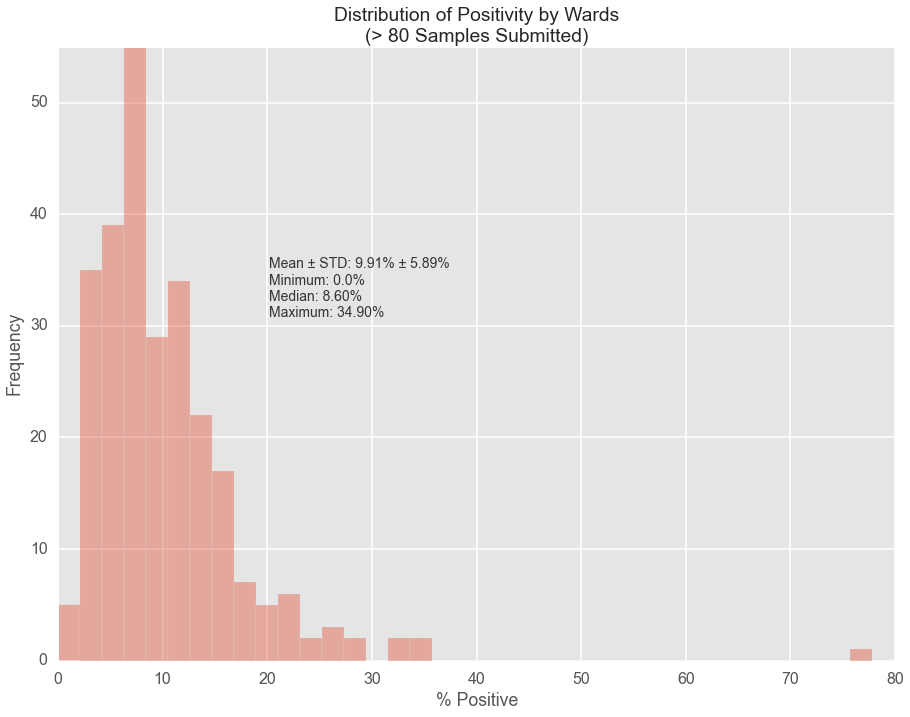

In [105]:
sns.set_context("poster")
np = rbwn[rbwn.Total > 80]
plt.figure(figsize=(15, 11))
plt.title("Distribution of Positivity by Wards\n(> 80 Samples Submitted)")
plt.ylabel("Frequency")
#plt.axvline(x=(np["Positivity (%)"].mean() + np["Positivity (%)"].std()),color='0.6',ls=':')
#plt.axvline(x=(np["Positivity (%)"].mean() - np["Positivity (%)"].std()),color='0.6',ls=':')
#plt.axvline(x=np["Positivity (%)"].mean(),color='r',ls=':')
sns.distplot(rbwn[rbwn.Total > 80]["Positivity (%)"].values, kde=False)
plt.xlabel("% Positive")
plt.ylim([0,55])
plt.text(20.2,30.8,"Mean ± STD: 9.91% ± 5.89%\nMinimum: 0.0%\nMedian: 8.60%\nMaximum: 34.90%", fontsize=14,color="0.2", fontname='Arial')
plt.savefig("Dist_Pos_by_Wards.png")

In [106]:
rbwn.sort_values(by = "Total", ascending=False)["Positivity (%)"].values#.to_excel("Results_by_Ward_Name_Sorted.xlsx")

array([  8.8,  32.8,  26.7, ...,   0. ,   0. ,   0. ])